In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [81]:
def get_date(unix_date):
    return datetime.datetime.fromtimestamp(int(unix_date)).strftime('%Y-%m-%d')

In [1]:
df = pd.read_csv('data/ted_main.csv')
df.columns

NameError: name 'pd' is not defined

In [83]:
df['film_date'] = df['film_date'].apply(get_date)
df['published_date'] = df['published_date'].apply(get_date)

Get top 15 talks

In [84]:
pop_talks = df[['name', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks

,name,views,film_date
0,Ken Robinson: Do schools kill creativity?,47227110,2006-02-24
1346,Amy Cuddy: Your body language may shape who yo...,43155405,2012-06-25
677,Simon Sinek: How great leaders inspire action,34309432,2009-09-16
837,Brené Brown: The power of vulnerability,31168150,2010-06-05
452,Mary Roach: 10 things you didn't know about or...,22270883,2009-02-05
1776,Julian Treasure: How to speak so that people w...,21594632,2013-06-09
201,Jill Bolte Taylor: My stroke of insight,21190883,2008-02-26
5,Tony Robbins: Why we do what we do,20685401,2006-02-01
2114,James Veitch: This is what happens when you re...,20475972,2015-12-07
1416,Cameron Russell: Looks aren't everything. Beli...,19787465,2012-10-26


* Ken Robinson's talk on Do Schools Kill Creativity? is the most popular TED Talk of all time with 47.2 million views.
* Robinson's talk is closely followed by Amy Cuddy's talk on Your Body Language May Shape Who You Are.
* There are only 2 talks that have surpassed the 40 million mark and 4 talks that have crossed the 30 million mark.

Text(0,0.5,'Views')

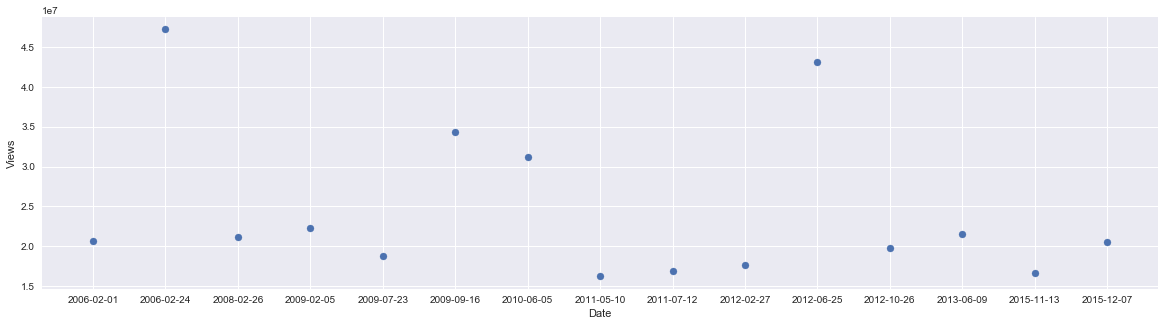

In [86]:
sorted_by_dates = pop_talks.sort_values("film_date")
plt.figure(figsize=(20, 5))
plt.scatter(sorted_by_dates["film_date"], sorted_by_dates["views"])
plt.xlabel("Date")
plt.ylabel("Views")

* There is a 6 year gap between two the most popular TED Talks;
* However, next 2 talks by popularity have just 9 months gap.

In [87]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [88]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

On average, there are 191.5 comments on every TED Talk. Assuming the comments are constructive criticism, we can conclude that the TED Online Community is highly involved in discussions revolving TED Talks.
There is a huge standard deviation associated with the comments. In fact, it is even larger than the mean suggesting that the measures may be sensitive to outliers. We shall plot this to check the nature of the distribution.
The minimum number of comments on a talk is 2 and the maximum is 6404. The range is 6402.. The minimum number, though, may be as a result of the talk being posted extremely recently.

In [91]:
len(df[df['comments'] > 1000]['comments'])

31

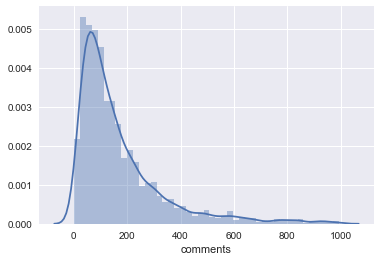

In [93]:
sns.distplot(df[df['comments'] < 1000]['comments'])

From the plot above, we can see that the bulk of the talks have fewer than 500 comments. This clearly suggests that the mean obtained above has been heavily influenced by outliers. This is possible because the number of samples is only 2550 talks.

Another question that I am interested in is if the number of views is correlated with the number of comments. We should think that this is the case as more popular videos tend to have more comments. Let us find out.

In [95]:
df[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


As the scatterplot and the correlation matrix show, the pearson coefficient is slightly more than 0.5. This suggests a medium to strong correlation between the two quantities. This result was pretty expected as mentioned above. Let us now check the number of views and comments on the 10 most commented TED Talks of all time.

In [96]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


As can be seen above, Richard Dawkins' talk on Militant Atheism' generated the greatest amount of discussion and opinions despite having significantly lesser views than Ken Robinson's talk, which is second in the list. This raises some interesting questions.

Which talks tend to attract the largest amount of discussion?

To answer this question, we will define a new feature discussion quotient which is simply the ratio of the number of comments to the number of views. We will then check which talks have the largest discussion quotient.

In [97]:
df['dis_quo'] = df['comments']/df['views']

In [98]:
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,2009-12-01
803,E-voting without fraud,David Bismark,543551,834,0.001534,2010-07-13
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,2002-02-01
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,2010-02-09
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,2011-03-02
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,2010-10-09
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,2010-12-07
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,2014-03-17
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,2010-02-10
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,2009-11-03


This analysis has actually raised extremely interesting insights. Half of the talks in the top 10 are on the lines of Faith and Religion. I suspect science and religion is still a very hotly debated topic even in the 21st century. We shall come back to this hypothesis in a later section.

The most discusses talk, though, is The Case for Same Sex Marriage (which has religious undertones). This is not that surprising considering the amount of debate the topic caused back in 2009 (the time the talk was filmed).

In [99]:
df['year'] = df['film_date'].apply(lambda x: x.split('-')[0])
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

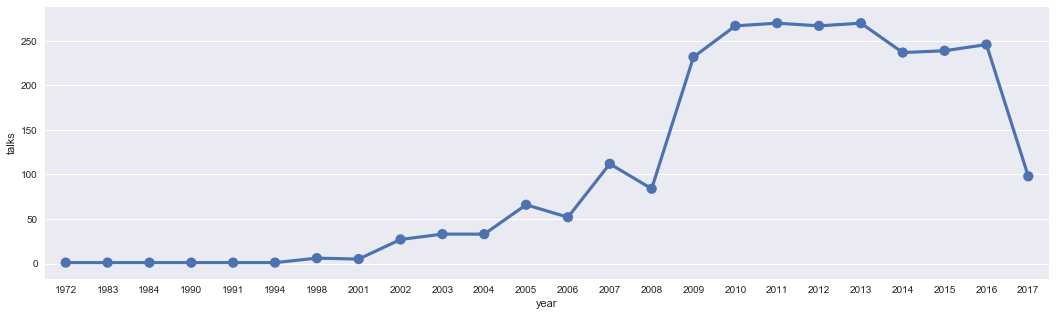

In [100]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

As expected, the number of TED Talks have gradually increased over the years since its inception in 1984.
There was a sharp increase in the number if talks in 2009. It might be interesting to know the reasons behind 2009 being the tipping point where the number of talks increased more than twofold.
The number of talks have been pretty much constant since 2009.

Do some professions tend to attract a larger number of viewers? Do answer this question let us visualise the relationship between the top 10 most popular professions and the views thet garnered in the form of a box plot.

In [101]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)

(0, 10000000.0)

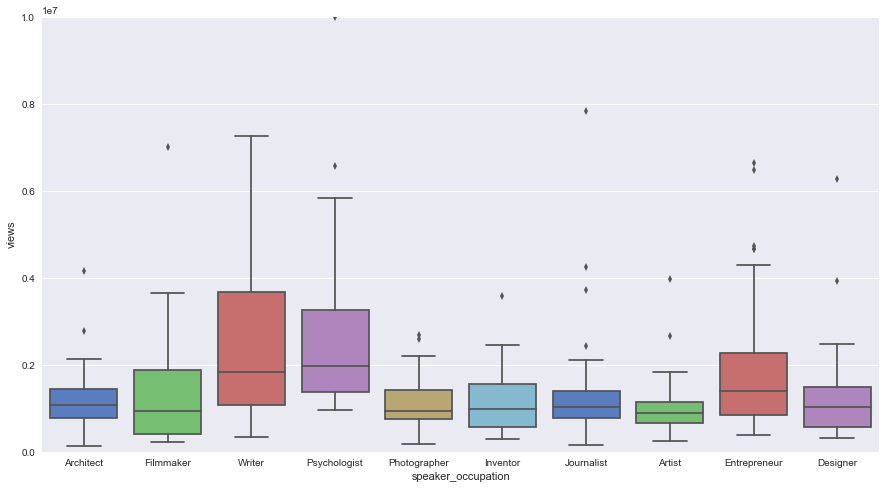

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 1e7])

On average, out of the top 10 most popular professions, Psychologists tend to garner the most views. Writers have the greatest range of views between the first and the third quartile..

Finally, let us check if there is a correlation between the number of views and the number of languages a talk is availbale in. We would think that this should be the case since the talk is more accessible to a larger number of people but as Matt Cutts' talk shows, it may not really be the case.

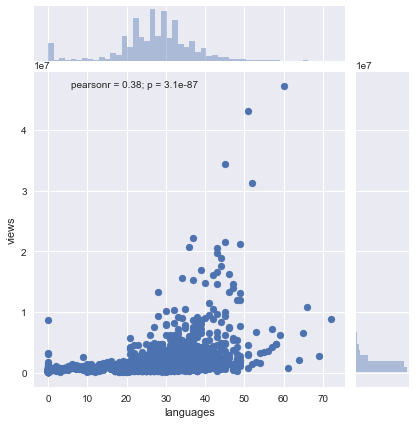

In [107]:
sns.jointplot(x='languages', y='views', data=df)

In [108]:
#Convert to minutes
df['duration'] = df['duration']/60
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

Text(336.971,0.5,'Views')

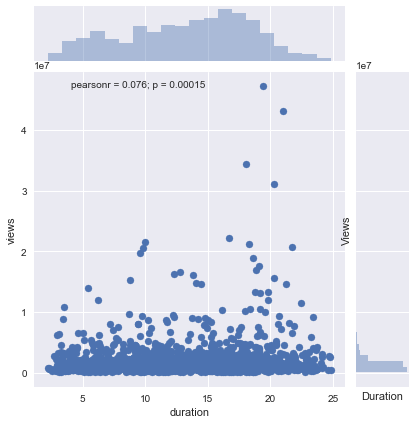

In [109]:
sns.jointplot(x='duration', y='views', data=df[df['duration'] < 25])
plt.xlabel('Duration')
plt.ylabel('Views')

There seems to be almost no correlation between these two quantities. This strongly suggests that there is no tangible correlation between the length and the popularity of a TED Talk. Content is king at TED.

In [119]:
import WordCloud

ModuleNotFoundError: No module named 'WordCloud'

In [111]:
df2 = pd.read_csv('data/transcripts.csv')

In [112]:
corpus = ' '.join(df2['transcript'])
corpus = corpus.replace('.', '. ')

In [113]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')

NameError: name 'WordCloud' is not defined

In [4]:
df = pd.read_csv('data/ted_main.csv')
df2 = pd.read_csv('data/transcripts.csv')
df.merge(df2, on="url")

In [7]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [8]:
df2.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [14]:
df.merge(df2, on="url")

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,Thank you. I have to tell you I'm both challen...
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987,"On September 10, the morning of my seventh bir..."
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,I'm going to present three projects in rapid f...
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,1138838400,32,Dan Dennett,Dan De